<a href="https://colab.research.google.com/github/ketangangal/ml_bootcamp_workshop/blob/main/nid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Steps For End to End Machine learning workshop



1.   Step 1 -> Install required Libraries.
2.   Step 2 -> Import required packages.
3.   Step 3 -> Load data.
4.   Step 4 -> Data understanding.
5.   Step 5 -> Exploratory Data Analysis.
6.   Step 6 -> Feature Engineering.
7.   Step 7 -> Data pre-processing.
8.   Step 8 -> Modelling.
9.   Step 9 -> Model Evaluation.
10.  Step 10 -> Hyper-parameter tuning and Re-modelling.
11.  Step 11 -> Extract Model.
12.  Step 12 -> Model Deployment.
13.  Step 13 -> Integrate a Machine Learning deployed model in external applications


# Step 1 -> Install required Libraries

In [ ]:
!pip install klib
!pip install lazypredict
!pip install xgboost

# Step 2 -> Import required packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import klib as kl
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import pickle

# Step 3 -> Load *data*

In [ ]:
df = pd.read_csv('nid.csv')
df.shape

(13599, 43)

In [ ]:
df.head()

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,0,tcp,ftp_data,SF,491,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,1,0,udp,other,SF,146,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,3,0,tcp,http,SF,232,8153,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
3,4,0,tcp,http,SF,199,420,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,12,0,tcp,http,SF,287,2251,0,0,0,...,219,1.00,0.00,0.12,0.03,0.00,0.00,0.00,0.00,normal


# Step 4 -> Data understanding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13599 entries, 0 to 13598
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   13599 non-null  int64  
 1   duration                     13599 non-null  int64  
 2   protocol_type                13599 non-null  object 
 3   service                      13599 non-null  object 
 4   flag                         13599 non-null  object 
 5   src_bytes                    13599 non-null  int64  
 6   dst_bytes                    13599 non-null  int64  
 7   land                         13599 non-null  int64  
 8   wrong_fragment               13599 non-null  int64  
 9   urgent                       13599 non-null  int64  
 10  hot                          13599 non-null  int64  
 11  num_failed_logins            13599 non-null  int64  
 12  logged_in                    13599 non-null  int64  
 13  num_compromised 

In [ ]:
df.describe(include='all')

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
count,13599.000000,13599.000000,13599,13599,13599,1.359900e+04,1.359900e+04,13599.000000,13599.000000,13599.0,...,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599
unique,NaN,NaN,3,51,10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,tcp,http,SF,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
freq,NaN,NaN,10807,7566,12693,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13449
mean,12495.645636,182.747776,NaN,NaN,NaN,1.164666e+04,4.352227e+03,0.000074,0.001177,0.0,...,187.626664,0.803486,0.041635,0.121749,0.025695,0.021073,0.013594,0.046417,0.044595,NaN
std,7333.313621,1371.063164,NaN,NaN,NaN,1.723699e+05,6.941981e+04,0.008575,0.058150,0.0,...,94.248057,0.331422,0.130418,0.255221,0.068712,0.122787,0.101307,0.195325,0.191117,NaN
min,0.000000,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,6113.500000,0.000000,NaN,NaN,NaN,1.050000e+02,8.100000e+01,0.000000,0.000000,0.0,...,110.000000,0.720000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,12521.000000,0.000000,NaN,NaN,NaN,2.320000e+02,3.700000e+02,0.000000,0.000000,0.0,...,255.000000,1.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,18848.000000,0.000000,NaN,NaN,NaN,3.240000e+02,2.009000e+03,0.000000,0.000000,0.0,...,255.000000,1.000000,0.020000,0.080000,0.030000,0.000000,0.000000,0.000000,0.000000,NaN


- The first column Unnamed: 0 appears to be an index or identifier.
- duration: Duration of the connection.
- protocol_type: Type of the protocol, e.g., tcp, udp.
- service: Network service on the destination, e.g., ftp_data, http.
- flag: Normal or error status of the connection.
- src_bytes and dst_bytes: Number of data bytes transferred from source to destination and vice versa.
- land: Indicates if the connection is from/to the same host/port.
- wrong_fragment: Number of "wrong" fragments.
- urgent: Number of urgent packets.

- There are several other features, mostly related to the network statistics and the behavior of the connection between the host and the destination.
- The final column class denotes the type of traffic, with the value normal indicating benign traffic.

# Step 5 -> Exploratory Data Analysis.

### Check the distribution of the 'class' column

In [ ]:
df['class'].value_counts()

normal     13449
anomaly      150
Name: class, dtype: int64

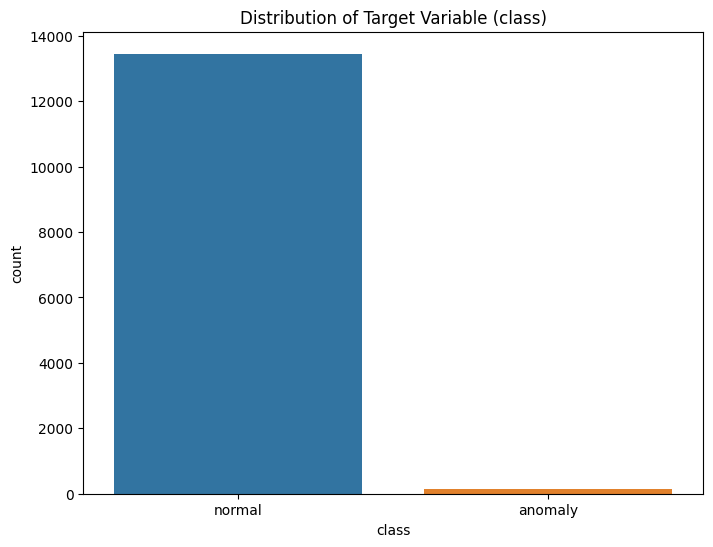

In [ ]:
# Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='class')
plt.title('Distribution of Target Variable (class)')
plt.show()

In [ ]:
class_distribution = df['class'].value_counts(normalize=True)
class_distribution

normal    0.99
anomaly   0.01
Name: class, dtype: float64

The distribution of the class column indicates:

- Approximately 98.9% of the entries are labeled as normal.
* Only about 1.1% of the entries are labeled as anomaly.
* This dataset is highly imbalanced with a significant majority of normal labels.

- This imbalance is important to note, especially when building predictive models, as it can influence the model's performance and evaluation metrics.

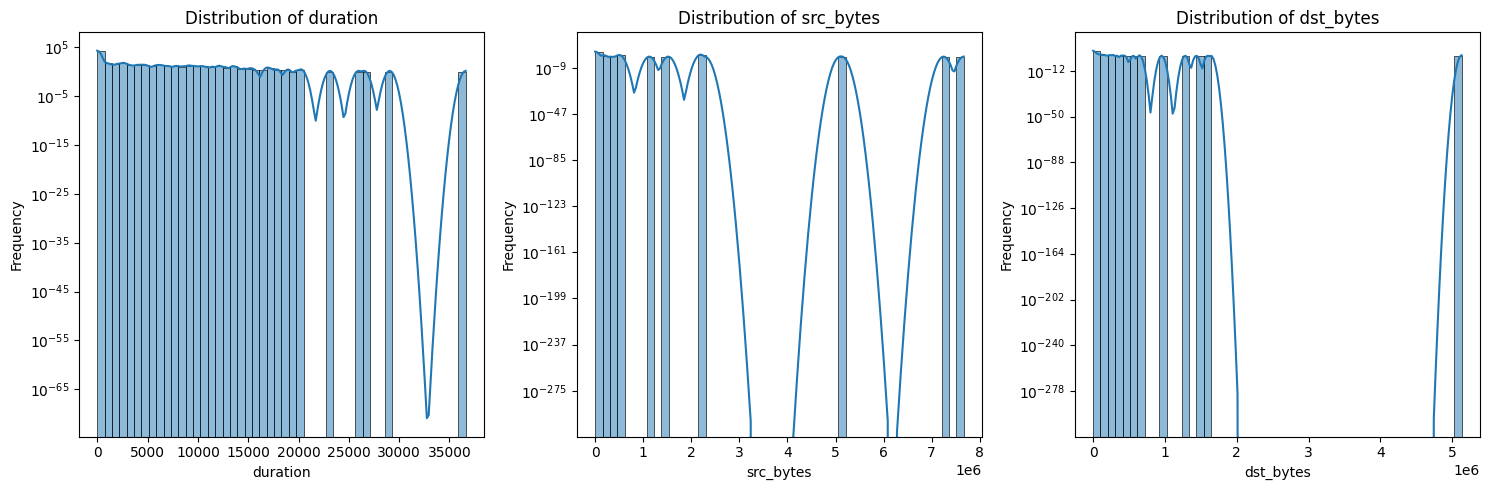

In [ ]:
# Distribution of selected numerical columns
selected_numerical_cols = ['duration', 'src_bytes', 'dst_bytes']

plt.figure(figsize=(15, 5))

for i, col in enumerate(selected_numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.yscale('log')  # Using log scale for better visualization

plt.tight_layout()
plt.show()


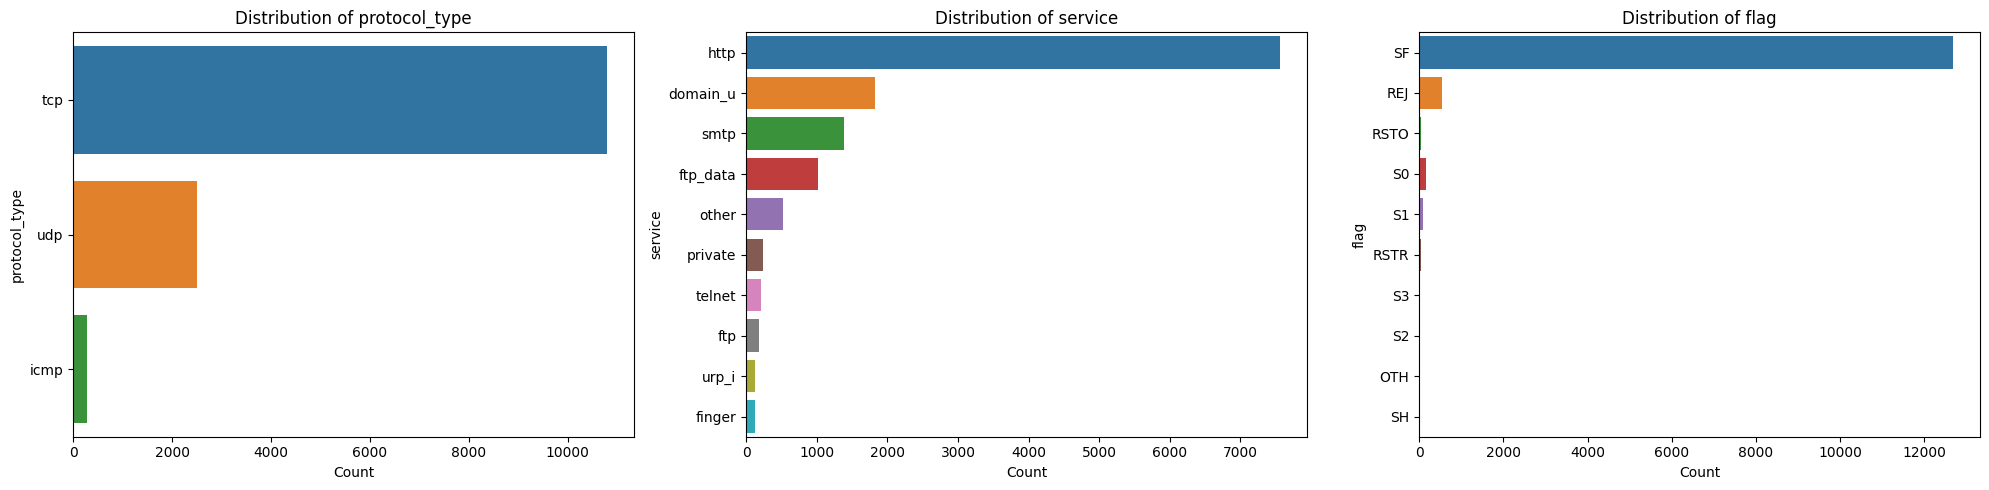

In [ ]:
# Distribution of selected categorical columns
selected_categorical_cols = ['protocol_type', 'service', 'flag']

plt.figure(figsize=(20, 5))

for i, col in enumerate(selected_categorical_cols, 1):
    plt.subplot(1, 3, i)
    if col == 'service':
        order = df[col].value_counts().index[:10]  # Top 10 services
        sns.countplot(data=df, y=col, order=order)
    else:
        sns.countplot(data=df, y=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


## Missing Values

In [ ]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
missing_values

Unnamed: 0                     0
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_r

# Step 6 -> Feature Engineering

In [ ]:
# remove the rows with missing values
kl.missingval_plot(df,figsize=(6,5))

No missing values found in the dataset.


In [ ]:
# remove the duplicated rows, we will ingore id column
print(df.shape)
df.drop_duplicates(subset=df.columns[1:],inplace=True)
print(df.shape)

(13599, 43)
(13599, 43)


**Even better, no duplicates in the data**

### Encoding the categorical features

In [ ]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

df['class'] = encoder.fit_transform(df['class'])

# Serialize the enoder using pickle
pickle_encoder_path = "encoder.pkl"
with open(pickle_encoder_path, 'wb') as file:
    pickle.dump(encoder, file)

pickle_encoder_path

'encoder.pkl'

In [ ]:
encoder.classes_

array(['anomaly', 'normal'], dtype=object)

In [ ]:
encoder.inverse_transform([1])

array(['normal'], dtype=object)

###  Feature Selection

#### Feature selection is crucial for improving the efficiency and performance of machine learning models, especially when dealing with datasets having many features. There are multiple methods to perform feature selection, including:

- Statistical Tests: For example, the chi-squared test for categorical variables.
- Correlation Coefficient: Features with high correlation might be redundant.
Recursive Feature Elimination: A method where features are recursively removed and the model is evaluated.
- Feature Importance from Tree-based models: Algorithms like Decision Trees, Random Forests, and Gradient Boosted Trees provide a feature importance score.

#### Correlation Matrix

<Axes: title={'center': 'Feature-correlation (pearson)'}>

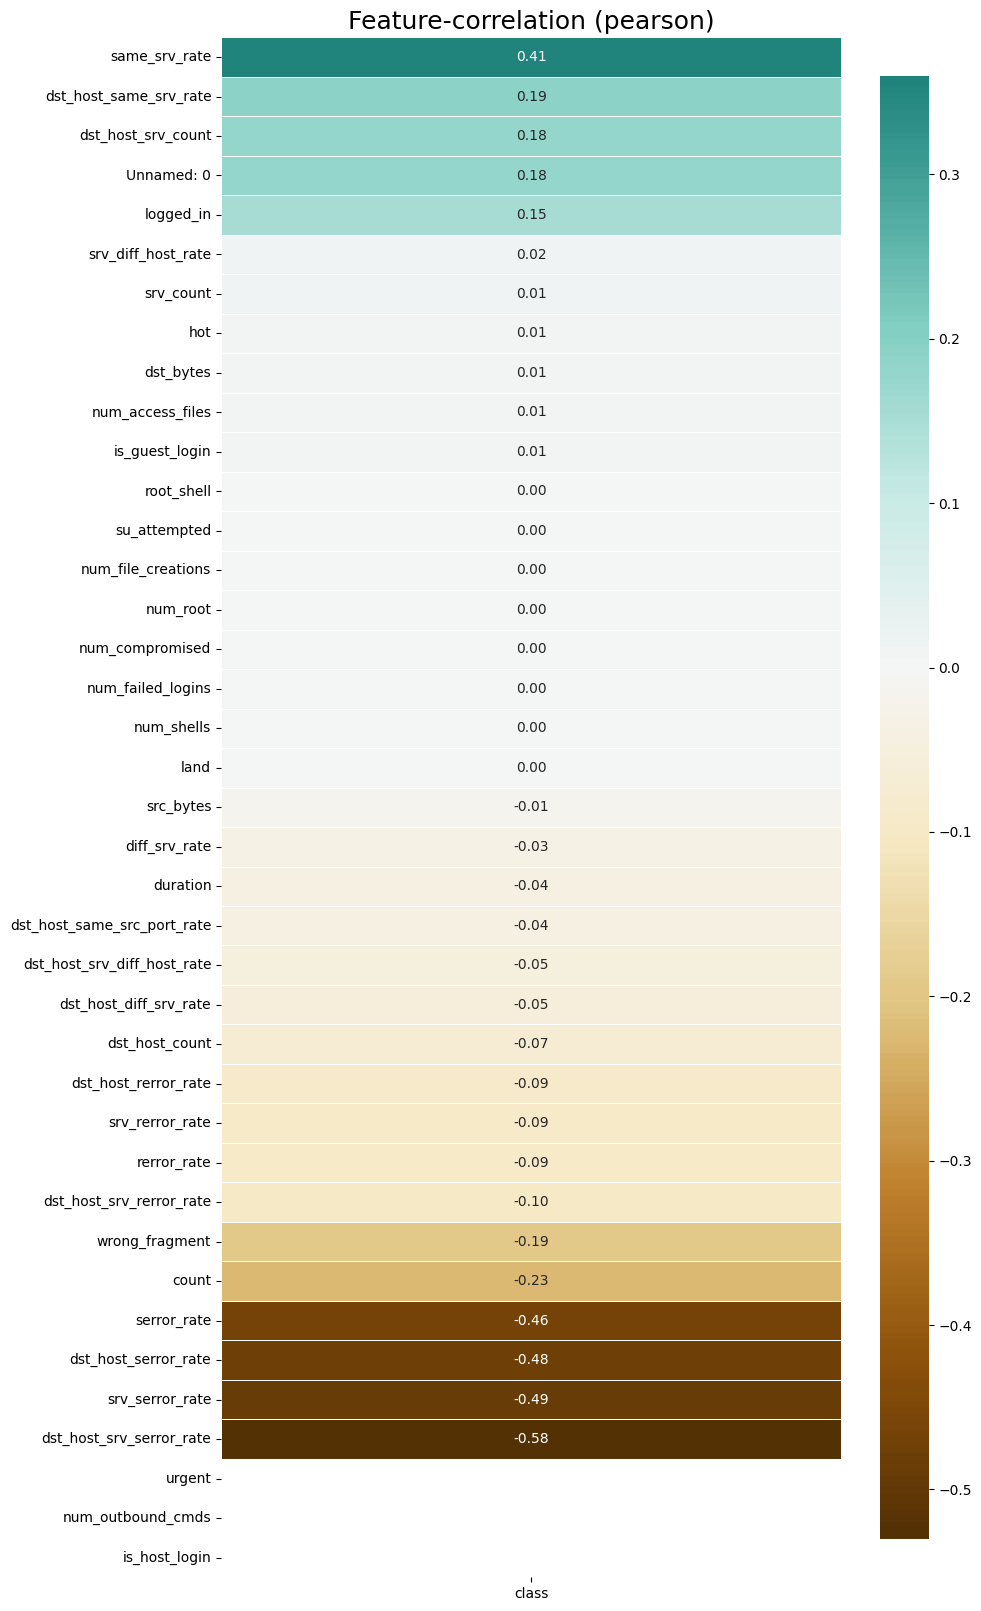

In [ ]:
# using coreelation matrix to find the most important features

kl.corr_plot(df,figsize=(10,20),target='class')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Preparing the data
X = df.drop(columns=['class', 'Unnamed: 0'])  # Removing the target and the index columns
y = df['class']

# Convert categorical columns to one-hot encoding
X = pd.get_dummies(X)

# Fit a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)



RandomForestClassifier(random_state=42)

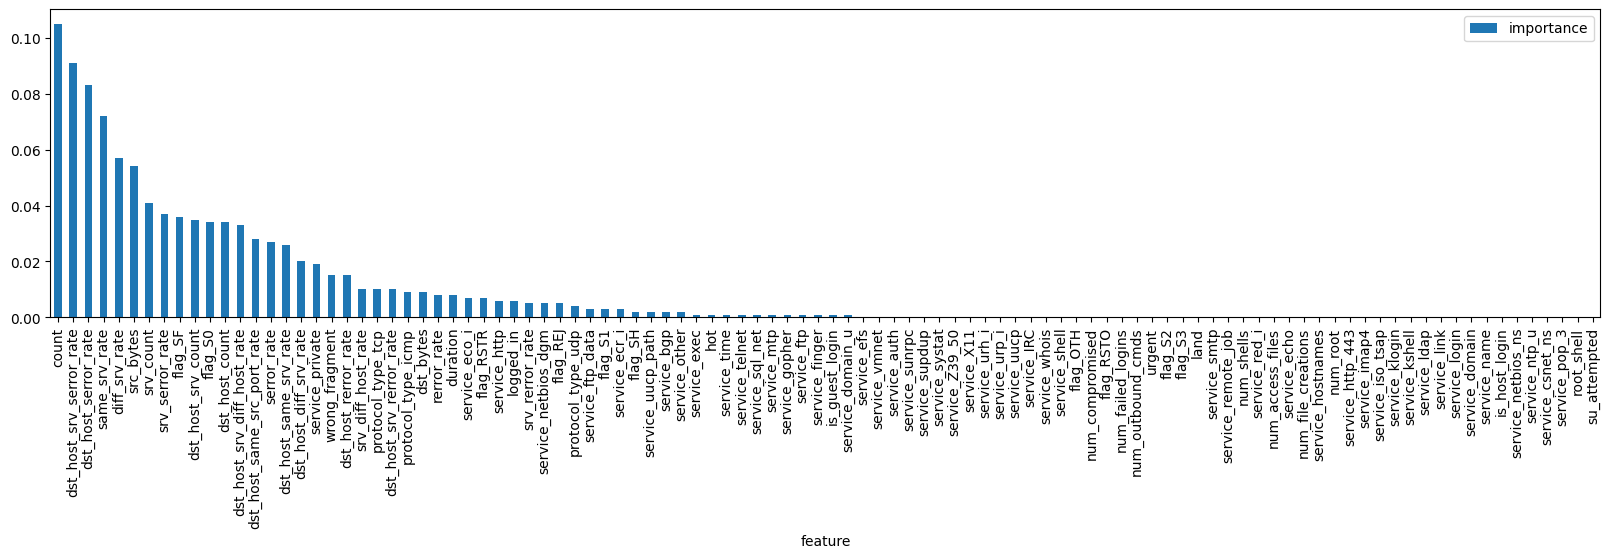

In [ ]:
score = np.round(clf.feature_importances_,3)
importances = pd.DataFrame({'feature':X.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

plt.rcParams['figure.figsize'] = (20, 4)
importances.plot.bar();

In [ ]:
# Get feature importances
feature_importances = clf.feature_importances_

# Pairing feature names with their importance scores
features = list(X.columns)
feature_importance_pairs = list(zip(features, feature_importances))

# Sort the feature importances in descending order
sorted_feature_importance = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

sorted_feature_importance[:15]  # Displaying the top 10 important features


[('count', 0.10452543529226342),
 ('dst_host_srv_serror_rate', 0.0906467859931518),
 ('dst_host_serror_rate', 0.08254086849583474),
 ('same_srv_rate', 0.07169028898235404),
 ('diff_srv_rate', 0.05708653618122465),
 ('src_bytes', 0.053675598348380725),
 ('srv_count', 0.04091370376700924),
 ('srv_serror_rate', 0.037388631761434844),
 ('flag_SF', 0.03588774968498735),
 ('dst_host_srv_count', 0.03463920909696265),
 ('dst_host_count', 0.03448167577313379),
 ('flag_S0', 0.03374203826760897),
 ('dst_host_srv_diff_host_rate', 0.033184464275119334),
 ('dst_host_same_src_port_rate', 0.027920866897536603),
 ('serror_rate', 0.02707754696574643)]

In [ ]:
# After testing it looks like this is the best selection

df = df.loc[:,['count',
 'dst_host_srv_serror_rate',
 'dst_host_serror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'src_bytes',
 'srv_count',
 'srv_serror_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_srv_count',
 'dst_host_count',
              'class']]

# Step 7 -> Data pre-processing

**Important Phase : next we will use a data augmentation method called SMOTE to balance the data, we will use it only on the train set to avoid overfitting, but we don't want to test our data on a made up data from SMOT, so we will use stratified sampling to keep the test data for later**

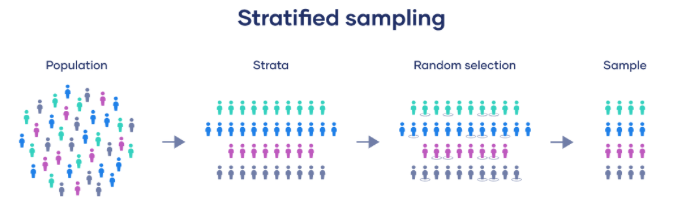

In [ ]:
# Stratified Sampling

X= df.drop('class',axis=1)
y= df['class']


# create a boolean mask for the second class
second_class_mask = (y == 1)

# split the second class into train and test sets
X_second_class = X[second_class_mask]
y_second_class = y[second_class_mask]
X_second_class_train, X_second_class_test, y_second_class_train, y_second_class_test = train_test_split(
    X_second_class, y_second_class, test_size=0.3, random_state=42)

# create a boolean mask for the first class
first_class_mask = (y == 0)

# split the first class into train and test sets
X_first_class = X[first_class_mask]
y_first_class = y[first_class_mask]
X_first_class_train, X_first_class_test, y_first_class_train, y_first_class_test = train_test_split(
    X_first_class, y_first_class, test_size=0.3, random_state=42)

# shuffle the train and test sets for each class
np.random.seed(42)
shuffle_idx_train = np.random.permutation(len(X_first_class_train) + len(X_second_class_train))
shuffle_idx_test = np.random.permutation(len(X_first_class_test) + len(X_second_class_test))
a = np.concatenate([X_first_class_train, X_second_class_train])[shuffle_idx_train]            #a is a dummy variable
b = np.concatenate([y_first_class_train, y_second_class_train])[shuffle_idx_train]             #b is a dummy variable
X_test = np.concatenate([X_first_class_test, X_second_class_test])[shuffle_idx_test]
y_test = np.concatenate([y_first_class_test, y_second_class_test])[shuffle_idx_test]            # we will use this for the final test

In [ ]:
pd.Series(y_test).value_counts()

1    4035
0      45
dtype: int64

### Data Augmentation :

Now we're ready for data augmentation

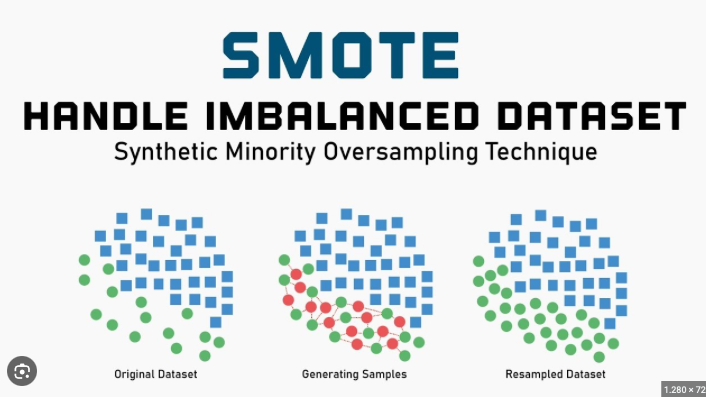

In [ ]:
print(df.shape)         # just to check the shape of the data

(13599, 12)


In [ ]:
print(df['class'].value_counts())         # same here to remind us of the distribution of the classes

1    13449
0      150
Name: class, dtype: int64


In [ ]:
X.head()

,count,dst_host_srv_serror_rate,dst_host_serror_rate,same_srv_rate,diff_srv_rate,src_bytes,srv_count,srv_serror_rate,dst_host_srv_diff_host_rate,dst_host_srv_count,dst_host_count
0,2,0.00,0.00,1.00,0.00,491,2,0.00,0.00,25,150
1,13,0.00,0.00,0.08,0.15,146,1,0.00,0.00,1,255
2,5,0.01,0.03,1.00,0.00,232,5,0.20,0.04,255,30
3,30,0.00,0.00,1.00,0.00,199,32,0.00,0.00,255,255
4,3,0.00,0.00,1.00,0.00,287,7,0.00,0.03,219,8


In [ ]:
# SMOTE Oversampling

from imblearn.over_sampling import SMOTE

X = df.drop('class',axis=1)
y = df['class']

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

print(X_smote.shape)
print(y_smote.shape)

(26898, 11)
(26898,)


In [ ]:
print(y_smote.value_counts())

1    13449
0    13449
Name: class, dtype: int64


<Axes: >

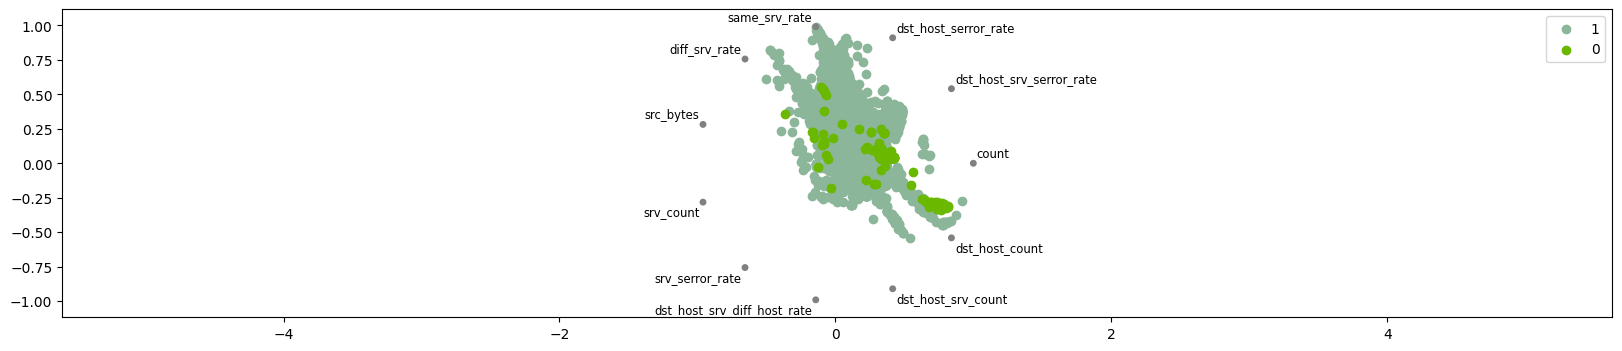

In [ ]:
pd.plotting.radviz(df, 'class')

**As we can see the data is now balanced**

### Step 8 -> Modeling :




In [ ]:
# Splitting the data into train and test

from sklearn.model_selection import train_test_split

X = X_smote
y = y_smote

X_train, a, y_train, b = train_test_split(X, y, test_size=0.3, random_state=101)  # a,b are dummy variables



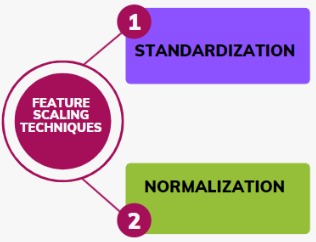

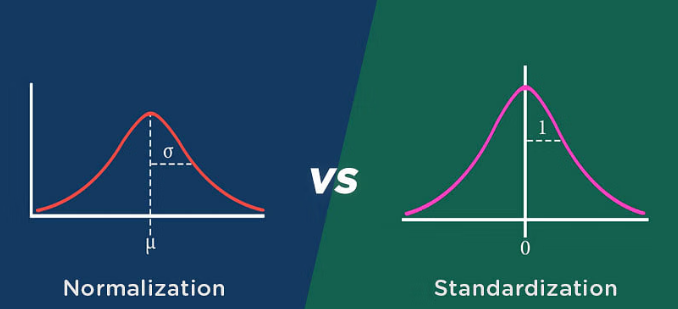

In [ ]:
# Scaling the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Serialize the scaler using pickle
pickle_scaler_path = "scaler.pkl"
with open(pickle_scaler_path, 'wb') as file:
    pickle.dump(scaler, file)

pickle_scaler_path

'scaler.pkl'

In [ ]:
# Model Building : our function to evaluate the model using cross validation and other metrics

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import cross_val_score



def model_eval(model,X,y):

    scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')

    print(f"ROC AUC: {scores.mean():.4f} (+/- {scores.std():.4f})")

    model.fit(X, y)
    pred = model.predict(X_test)


    print(classification_report(y_test, pred))
    print(confusion_matrix(y_test, pred))
    print(accuracy_score(y_test, pred))
    print(roc_auc_score(y_test, pred))


    fpr, tpr, thresholds = roc_curve(y_test, pred)
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.show()

Now let's start testing some models

ROC AUC: 0.9874 (+/- 0.0021)
              precision    recall  f1-score   support

           0       0.15      0.91      0.25        45
           1       1.00      0.94      0.97      4035

    accuracy                           0.94      4080
   macro avg       0.57      0.93      0.61      4080
weighted avg       0.99      0.94      0.96      4080

[[  41    4]
 [ 237 3798]]
0.9409313725490196
0.9261875258157787


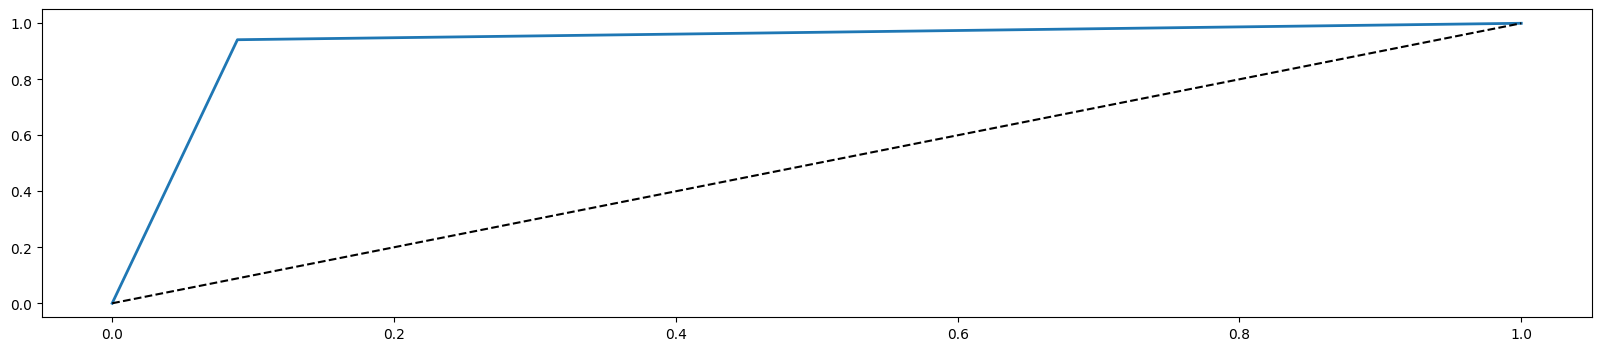

In [ ]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model_eval(model,X_train,y_train)


In [ ]:
# trying to find the best k value
#from sklearn.neighbors import KNeighborsClassifier
#for k in range(1,10):
#    model = KNeighborsClassifier(n_neighbors=k)
#    model_eval(model,X_train,y_train)

In [ ]:
# KNN

#model = KNeighborsClassifier(1)
#model_eval(model,X_train,y_train)

In [ ]:
# LGBM
#
#from lightgbm import LGBMClassifier
#
#model = LGBMClassifier()
#model_eval(model,X_train,y_train)

In [ ]:
# XGBoost
#
#
#from xgboost import XGBClassifier
#
#model = XGBClassifier()
#model_eval(model,X_train,y_train)

In [ ]:
# if you want fast reuslt , uncomment one of the models above and comment this cell
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,predictions=True)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

 97%|█████████▋| 28/29 [01:36<00:01,  1.66s/it]

[LightGBM] [Info] Number of positive: 9378, number of negative: 9450
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003697 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2667
[LightGBM] [Info] Number of data points in the train set: 18828, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498088 -> initscore=-0.007648
[LightGBM] [Info] Start training from score -0.007648


100%|██████████| 29/29 [01:37<00:00,  3.35s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,1.00,1.00,1.00,1.00,1.58
RandomForestClassifier,1.00,1.00,1.00,1.00,1.41
LGBMClassifier,1.00,1.00,1.00,1.00,0.66
ExtraTreesClassifier,1.00,1.00,1.00,1.00,2.16
DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.16
BaggingClassifier,1.00,1.00,1.00,1.00,0.77
ExtraTreeClassifier,1.00,1.00,1.00,1.00,0.06
KNeighborsClassifier,0.99,0.98,0.98,0.99,1.02
AdaBoostClassifier,0.98,0.97,0.97,0.99,1.63


# Step 9 -> Model Evaluation

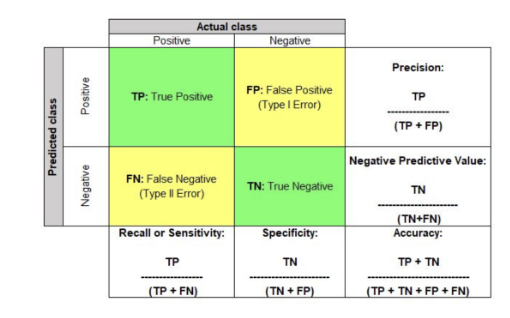

In [ ]:
from sklearn.metrics import classification_report
for i in predictions.columns.tolist():
    print('\t\t',i,'\n')
    print(classification_report(y_test, predictions[i]),'\n')

		 AdaBoostClassifier 

              precision    recall  f1-score   support

           0       0.37      0.96      0.53        45
           1       1.00      0.98      0.99      4035

    accuracy                           0.98      4080
   macro avg       0.68      0.97      0.76      4080
weighted avg       0.99      0.98      0.99      4080
 

		 BaggingClassifier 

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        45
           1       1.00      1.00      1.00      4035

    accuracy                           1.00      4080
   macro avg       0.97      1.00      0.98      4080
weighted avg       1.00      1.00      1.00      4080
 

		 BernoulliNB 

              precision    recall  f1-score   support

           0       0.15      0.78      0.25        45
           1       1.00      0.95      0.97      4035

    accuracy                           0.95      4080
   macro avg       0.57      0.86      0.61      4080
weight

# BONUS

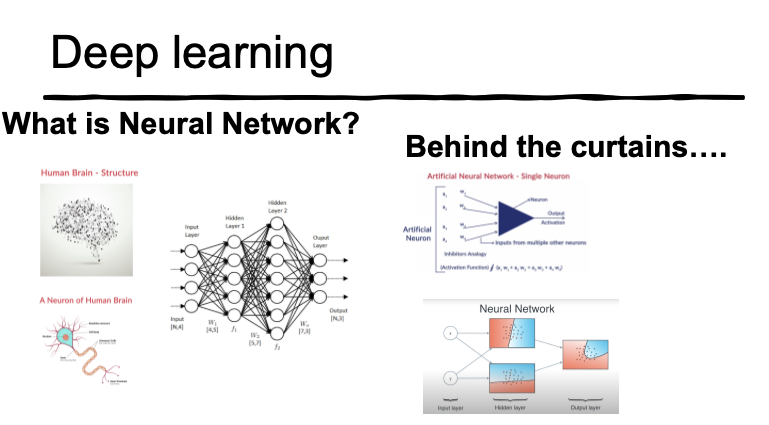

Epoch 1/20
589/589 [==============================] - 3s 3ms/step - loss: 0.3276 - val_loss: 0.1397
Epoch 2/20
589/589 [==============================] - 1s 2ms/step - loss: 0.1846 - val_loss: 0.1356
Epoch 3/20
589/589 [==============================] - 1s 2ms/step - loss: 0.1637 - val_loss: 0.1255
Epoch 4/20
589/589 [==============================] - 1s 2ms/step - loss: 0.1499 - val_loss: 0.1197
Epoch 5/20
589/589 [==============================] - 2s 3ms/step - loss: 0.1421 - val_loss: 0.1152
Epoch 6/20
589/589 [==============================] - 2s 3ms/step - loss: 0.1352 - val_loss: 0.1159
Epoch 7/20
589/589 [==============================] - 1s 2ms/step - loss: 0.1330 - val_loss: 0.1088
Epoch 8/20
589/589 [==============================] - 1s 2ms/step - loss: 0.1275 - val_loss: 0.1079
Epoch 9/20
589/589 [==============================] - 1s 2ms/step - loss: 0.1249 - val_loss: 0.1027
Epoch 10/20
589/589 [==============================] - 1s 2ms/step - loss: 0.1223 - val_loss: 0.1086

['loss']

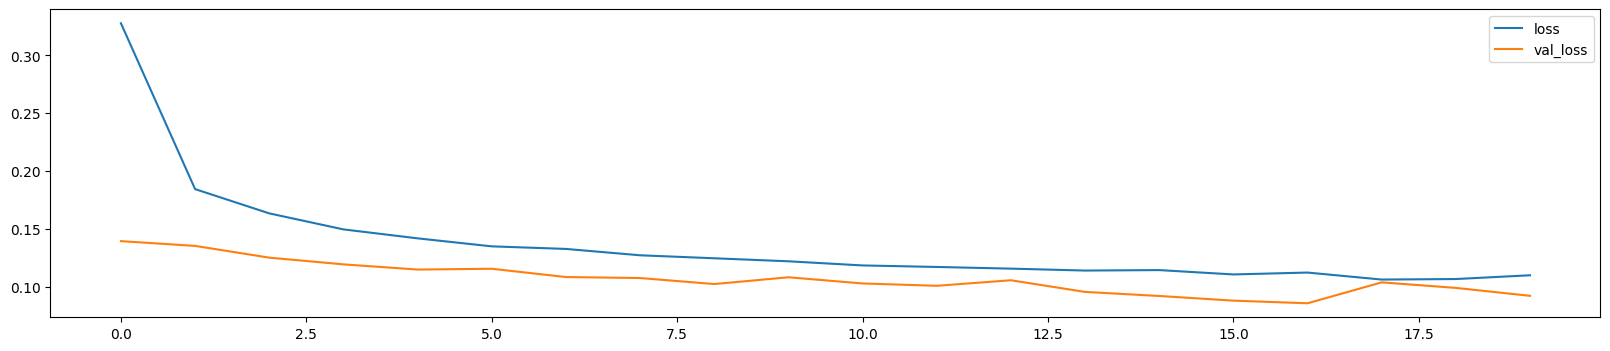

In [ ]:
# Neural Network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

model.fit(x=X_train,y=y_train,epochs=20,validation_data=(X_test,y_test))

losses = pd.DataFrame(model.history.history)

losses[['loss','val_loss']].plot()

model.metrics_names

In [ ]:
# evaluating the model

predictions = model.predict(X_test)
predictions = (predictions > 0.07)              # here we added a threshold value, we sacrifice recall for precision

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

128/128 [==============================] - 0s 1ms/step
[[  35   10]
 [   5 4030]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        45
           1       1.00      1.00      1.00      4035

    accuracy                           1.00      4080
   macro avg       0.94      0.89      0.91      4080
weighted avg       1.00      1.00      1.00      4080



### Step 10 -> Hyper-parameter tuning and Re-modelling.

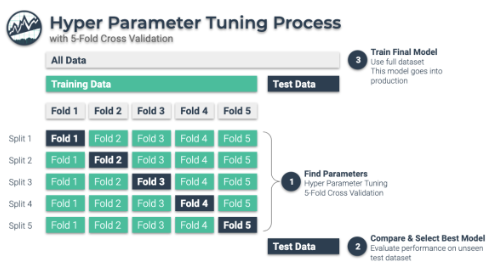

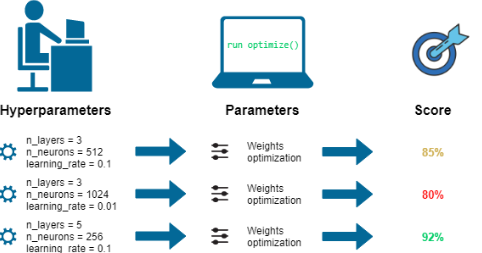

ROC AUC: 1.0000 (+/- 0.0000)
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       1.00      1.00      1.00      4035

    accuracy                           1.00      4080
   macro avg       0.99      1.00      0.99      4080
weighted avg       1.00      1.00      1.00      4080

[[  45    0]
 [   1 4034]]
0.9997549019607843
0.9998760842627014


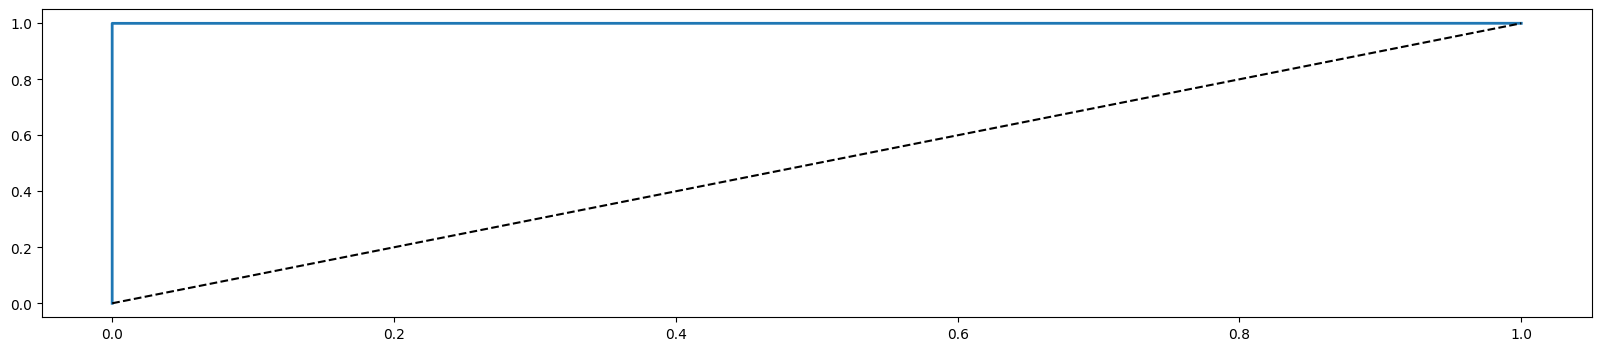

In [ ]:
# XGBoost
#
#
from xgboost import XGBClassifier
#
model = XGBClassifier()
model_eval(model,X_train,y_train)

# Step 11 -> Extract model

In [ ]:
# Serialize the trained Random Forest model using pickle
pickle_model_path = "model.pkl"
with open(pickle_model_path, 'wb') as file:
    pickle.dump(model, file)

pickle_model_path


'model.pkl'

# Step 12 -> Model deployment

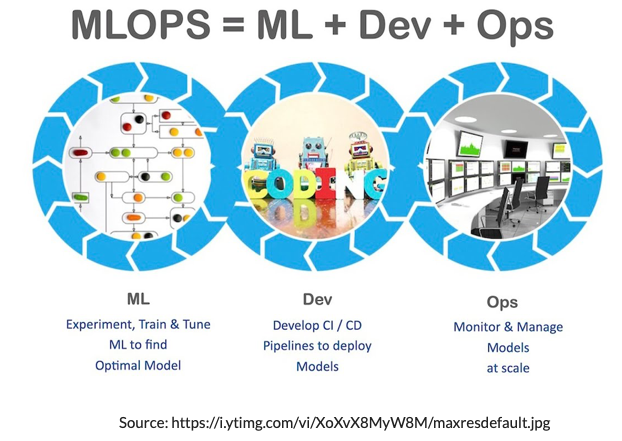

# Step 13 -> Real world Prediction

In [ ]:
import requests

def call_api(url, json_data):
    """
    Call an API with a given URL and JSON payload.

    Args:
    - url (str): The API endpoint to call.
    - json_data (dict): The JSON data to send in the request.

    Returns:
    - dict: The API response as a dictionary.
    """
    headers = {
        'Content-Type': 'application/json'
    }

    response = requests.post(url, headers=headers, json=json_data)

    if response.status_code == 200:
        return response.json()
    else:
        response.raise_for_status()

# Example usage
# url = 'https://api.example.com/data'
# json_input = {"key": "value"}
# response = call_api(url, json_input)
# print(response)


In [ ]:
url="http://ec2-35-154-40-171.ap-south-1.compute.amazonaws.com:8080/predict"

In [ ]:
json_data=X.iloc[15000:16000].to_dict()

In [ ]:
X.iloc[5000].to_dict()

{'count': 1.0,
 'dst_host_srv_serror_rate': 0.0,
 'dst_host_serror_rate': 0.0,
 'same_srv_rate': 1.0,
 'diff_srv_rate': 0.0,
 'src_bytes': 641.0,
 'srv_count': 1.0,
 'srv_serror_rate': 0.0,
 'dst_host_srv_diff_host_rate': 0.06,
 'dst_host_srv_count': 33.0,
 'dst_host_count': 68.0}

In [ ]:
results=call_api(url, json_data)

In [ ]:
results["Result"]

"['anomaly' 'anomaly' 'anomaly' 'anomaly' 'anomaly' 'anomaly' 'anomaly'\n 'anomaly' 'anomaly' 'anomaly' 'anomaly' 'anomaly' 'anomaly' 'anomaly'\n 'anomaly' 'anomaly' 'anomaly' 'anomaly' 'anomaly' 'anomaly' 'anomaly'\n 'anomaly' 'anomaly' 'anomaly' 'anomaly' 'anomaly' 'anomaly' 'anomaly'\n 'anomaly' 'anomaly' 'anomaly' 'anomaly' 'anomaly' 'anomaly' 'anomaly'\n 'anomaly' 'anomaly' 'anomaly' 'anomaly' 'anomaly' 'anomaly' 'anomaly'\n 'anomaly' 'anomaly' 'anomaly' 'anomaly' 'anomaly' 'anomaly' 'anomaly'\n 'anomaly' 'anomaly' 'anomaly' 'anomaly' 'anomaly' 'anomaly' 'anomaly'\n 'anomaly' 'anomaly' 'anomaly' 'anomaly' 'anomaly' 'anomaly' 'anomaly'\n 'anomaly' 'anomaly' 'anomaly' 'anomaly' 'anomaly' 'anomaly' 'anomaly'\n 'anomaly' 'anomaly' 'anomaly' 'anomaly' 'anomaly' 'anomaly' 'anomaly'\n 'anomaly' 'anomaly' 'anomaly' 'anomaly' 'anomaly' 'anomaly' 'anomaly'\n 'anomaly' 'anomaly' 'anomaly' 'anomaly' 'anomaly' 'anomaly' 'anomaly'\n 'anomaly' 'anomaly' 'anomaly' 'anomaly' 'anomaly' 'anomaly' 'a

In [ ]:
y.iloc[15000:16000].to_dict()

{15000: 0,
 15001: 0,
 15002: 0,
 15003: 0,
 15004: 0,
 15005: 0,
 15006: 0,
 15007: 0,
 15008: 0,
 15009: 0,
 15010: 0,
 15011: 0,
 15012: 0,
 15013: 0,
 15014: 0,
 15015: 0,
 15016: 0,
 15017: 0,
 15018: 0,
 15019: 0,
 15020: 0,
 15021: 0,
 15022: 0,
 15023: 0,
 15024: 0,
 15025: 0,
 15026: 0,
 15027: 0,
 15028: 0,
 15029: 0,
 15030: 0,
 15031: 0,
 15032: 0,
 15033: 0,
 15034: 0,
 15035: 0,
 15036: 0,
 15037: 0,
 15038: 0,
 15039: 0,
 15040: 0,
 15041: 0,
 15042: 0,
 15043: 0,
 15044: 0,
 15045: 0,
 15046: 0,
 15047: 0,
 15048: 0,
 15049: 0,
 15050: 0,
 15051: 0,
 15052: 0,
 15053: 0,
 15054: 0,
 15055: 0,
 15056: 0,
 15057: 0,
 15058: 0,
 15059: 0,
 15060: 0,
 15061: 0,
 15062: 0,
 15063: 0,
 15064: 0,
 15065: 0,
 15066: 0,
 15067: 0,
 15068: 0,
 15069: 0,
 15070: 0,
 15071: 0,
 15072: 0,
 15073: 0,
 15074: 0,
 15075: 0,
 15076: 0,
 15077: 0,
 15078: 0,
 15079: 0,
 15080: 0,
 15081: 0,
 15082: 0,
 15083: 0,
 15084: 0,
 15085: 0,
 15086: 0,
 15087: 0,
 15088: 0,
 15089: 0,
 15090: 0,